# Day 77

#### Matplotlib Built-In modules Day 7

Welcome to the Data Analyzer and Plotter!
Data Analysis Results:
Mean Marks: 729.2
Median Marks: 743.0
Standard Deviation of Marks: 60.61979874595428


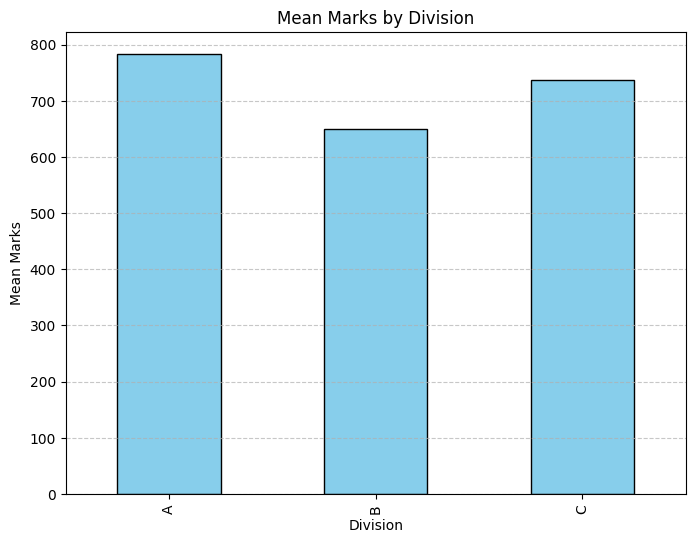

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class DataAnalyzer:
    def __init__(self, data_file):
        self.data_file = data_file

    def load_data(self):
        try:
            return pd.read_csv(self.data_file)
        except FileNotFoundError:
            print(f"File '{self.data_file}' not found.")
            return None
        except pd.errors.EmptyDataError:
            print(f"File '{self.data_file}' is empty.")
            return None
        except pd.errors.ParserError:
            print(f"Error parsing '{self.data_file}'. Check the file format.")
            return None

    def analyze_data(self, data):
        if data is None:
            return None

        try:
            # Calculate basic statistics using NumPy
            mean_marks = np.mean(data['Marks'])
            median_marks = np.median(data['Marks'])
            std_deviation = np.std(data['Marks'])
            return mean_marks, median_marks, std_deviation
        except KeyError:
            print("Column 'Marks' not found in the data.")
            return None

    def plot_data(self, data):
        if data is None:
            return

        try:
            plt.figure(figsize=(8, 6))  # Set figure size

            # Create a bar plot of marks by division
            data_grouped = data.groupby('Division')['Marks'].mean()
            data_grouped.plot(kind='bar', color='skyblue', edgecolor='black')
            plt.xlabel('Division')
            plt.ylabel('Mean Marks')
            plt.title('Mean Marks by Division')
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.show()
        except ValueError:
            print("Error while plotting data. Ensure 'Marks' column contains numeric values.")

def main():
    print("Welcome to the Data Analyzer and Plotter!")

    data_file = "data.csv"  # Replace with your CSV file path
    data_analyzer = DataAnalyzer(data_file)

    data = data_analyzer.load_data()
    if data is not None:
        analysis_result = data_analyzer.analyze_data(data)
        if analysis_result is not None:
            mean, median, std_dev = analysis_result
            print("Data Analysis Results:")
            print(f"Mean Marks: {mean}")
            print(f"Median Marks: {median}")
            print(f"Standard Deviation of Marks: {std_dev}")

        data_analyzer.plot_data(data)

if __name__ == "__main__":
    main()
